## **Problem Statement**
Saudi Aramco is one of the largest publicly traded companies, and its stock price is influenced by various factors such as market trends, oil prices, economic policies, and investor sentiment. Predicting stock prices accurately is crucial for investors, financial analysts, and stakeholders to make informed decisions. However, stock prices are highly volatile, making accurate prediction a complex challenge.

This project aims to develop a machine learning model to forecast Saudi Aramco’s stock closing prices based on historical data and various technical indicators. The goal is to identify meaningful patterns and trends that can help predict future stock prices, improving investment strategies.

## **Project Objectives**
The primary objective of this project is to develop a robust, interpretable stock price prediction model using historical data and engineered features. We ensured data quality through rigorous preprocessing and evaluated multiple models using metrics such as MSE, RMSE, MAE, and R². Cross-validation confirmed the model’s stability and generalizability, and feature selection was applied to enhance efficiency by removing irrelevant predictors. The final model is saved for deployment, and future work will focus on incorporating deep learning techniques and external market factors to further improve forecasting accuracy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Loading the dataset

In [3]:
df = pd.read_csv('aramco_stock_price_dataset.csv', encoding='utf-8')

## Data Understanding & Intitial EDA

In [4]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Change_Close,Change_Volume,Weekday,Month,Year,Quarter,Volume_Normalized
0,2019-12-11 00:00:00+03:00,25.485229,25.485229,25.485229,25.485229,38289394,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,12,2019,4,1.580604
1,2019-12-12 00:00:00+03:00,28.019275,28.019275,26.064442,26.643652,505692621,0.0,0.0,1.158422,25.485229,...,NaN,NaN,NaN,1.158422,467403227.0,3,12,2019,4,27.146985
2,2019-12-15 00:00:00+03:00,26.860858,27.150462,26.643654,27.078060,98349281,0.0,0.0,0.434408,26.643652,...,NaN,NaN,NaN,0.434408,-407343340.0,6,12,2019,4,4.865806


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1095 non-null   object 
 1   Open               1095 non-null   float64
 2   High               1095 non-null   float64
 3   Low                1095 non-null   float64
 4   Close              1095 non-null   float64
 5   Volume             1095 non-null   int64  
 6   Dividends          1095 non-null   float64
 7   Stock Splits       1095 non-null   float64
 8   Close_diff         1094 non-null   float64
 9   Lag_Close          1094 non-null   float64
 10  Lag_High           1094 non-null   float64
 11  Lag_Low            1094 non-null   float64
 12  Rolling_Mean_7     1089 non-null   float64
 13  Rolling_Std_7      1089 non-null   float64
 14  Rolling_Mean_30    1066 non-null   float64
 15  Rolling_Std_30     1066 non-null   float64
 16  RSI                1082 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1095.0,2.885776e+01,3.472621e+00,1.954834e+01,2.654623e+01,2.843185e+01,3.184231e+01,3.641110e+01
High,1095.0,2.903354e+01,3.503517e+00,2.048955e+01,2.665929e+01,2.856368e+01,3.203948e+01,3.713932e+01
Low,1095.0,2.867893e+01,3.421617e+00,1.954834e+01,2.643623e+01,2.821213e+01,3.169444e+01,3.615408e+01
Close,1095.0,2.886365e+01,3.458323e+00,2.012754e+01,2.654817e+01,2.847579e+01,3.184231e+01,3.641110e+01
Volume,1095.0,9.392873e+06,1.829030e+07,0.000000e+00,3.777274e+06,6.202220e+06,1.108638e+07,5.056926e+08
Dividends,1095.0,3.695110e-03,3.158860e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.024000e-01
Stock Splits,1095.0,4.018265e-03,6.639255e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+00
Close_diff,1094.0,4.081144e-03,3.196540e-01,-2.172035e+00,-1.134429e-01,0.000000e+00,1.157408e-01,2.027229e+00
Lag_Close,1094.0,2.886265e+01,3.459748e+00,2.012754e+01,2.654735e+01,2.847579e+01,3.184231e+01,3.641110e+01
Lag_High,1094.0,2.903257e+01,3.504971e+00,2.048955e+01,2.665837e+01,2.855394e+01,3.203948e+01,3.713932e+01


In [7]:
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Close_diff            1
Lag_Close             1
Lag_High              1
Lag_Low               1
Rolling_Mean_7        6
Rolling_Std_7         6
Rolling_Mean_30      29
Rolling_Std_30       29
RSI                  13
MACD                  0
BB_Middle_Band       19
BB_Upper_Band        19
BB_Lower_Band        19
Change_Close          1
Change_Volume         1
Weekday               0
Month                 0
Year                  0
Quarter               0
Volume_Normalized     0
dtype: int64

In [8]:
df.shape

(1095, 28)

In [9]:
df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Dividends            float64
Stock Splits         float64
Close_diff           float64
Lag_Close            float64
Lag_High             float64
Lag_Low              float64
Rolling_Mean_7       float64
Rolling_Std_7        float64
Rolling_Mean_30      float64
Rolling_Std_30       float64
RSI                  float64
MACD                 float64
BB_Middle_Band       float64
BB_Upper_Band        float64
BB_Lower_Band        float64
Change_Close         float64
Change_Volume        float64
Weekday                int64
Month                  int64
Year                   int64
Quarter                int64
Volume_Normalized    float64
dtype: object

In [10]:
df.duplicated().sum()

0

## Observations
- The dataset has 1095 rows and 28 columns, including fields such as Date, Open, High, Low, Close, Volume, and engineered features like Lag_Close and Bollinger Bands.

- **Data types:** Most columns are numeric. The Date column is an object and needs to be converted to datetime.

- **Missing values:** There are missing values in the rolling and lag features (this is expected because of the window calculations). Core columns like price and volume have no missing values.

- **Price range:** The values for Open, High, Low, and Close range between approximately 19.5 and 37.1.

- **Volume:** The volume shows high variability, from 0 up to over 500 million.

- **Technical indicators:** Indicators like RSI and MACD show typical market behavior.

- **Duplicates:** No duplicate rows are found in the dataset.

#### defining colors

In [11]:
color1 = '#A594F9'
color2 = '#CDC1FF'
color3 = '#E5D9F2'

## Data Cleaning

#### Convert Date Column  
- The `Date` column is in object format, which is unsuitable for time-series analysis.  
- **Action:** Convert it to datetime.  

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

A barplot is used to visualize missing values in each column.

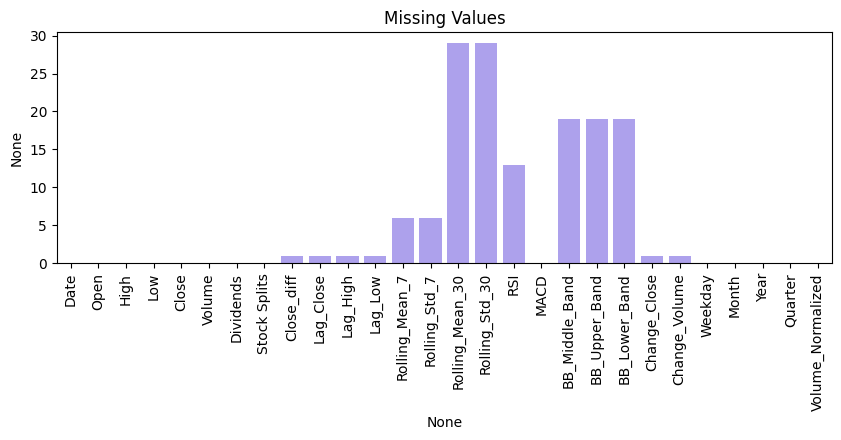

In [13]:
plt.figure(figsize=(10, 3))       
sns.barplot(x=df.columns, y=df.isnull().sum(), color=color1)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

#### Handle Missing Data
- Missing values exist in rolling features, lag features, and technical indicators due to window calculations.
- **Action:** Use backfill since previous values are available. Forward fill would not work as initial values are missing.

In [14]:
cols_to_bfill = ['Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_30', 'Rolling_Std_30',
                 'Close_diff', 'Lag_Close', 'Lag_High', 'Lag_Low' , 'BB_Middle_Band', 'BB_Upper_Band', 'BB_Lower_Band', 'RSI', 'Change_Close', 'Change_Volume']

for col in cols_to_bfill:
    df[col] = df[col].fillna(method='bfill')


Check if any missing values remain after filling.

In [15]:
df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
Close_diff           0
Lag_Close            0
Lag_High             0
Lag_Low              0
Rolling_Mean_7       0
Rolling_Std_7        0
Rolling_Mean_30      0
Rolling_Std_30       0
RSI                  0
MACD                 0
BB_Middle_Band       0
BB_Upper_Band        0
BB_Lower_Band        0
Change_Close         0
Change_Volume        0
Weekday              0
Month                0
Year                 0
Quarter              0
Volume_Normalized    0
dtype: int64

#### **Observation:** 
 The output confirms all missing values are filled, ensuring a clean dataset for further analysis.

#### **Summary:**
The Date column was converted to datetime, missing values were visualized, and relevant features were filled using backfill. The dataset is   now Cleaned and ready for further analysis.

## Visule **EDA**(Chart Based Analysis)

#### **1** - Close Price Distribution
- Visualizing the distribution of closing prices using KDE.
- Dashed lines represent the mean and median to compare the central tendency.

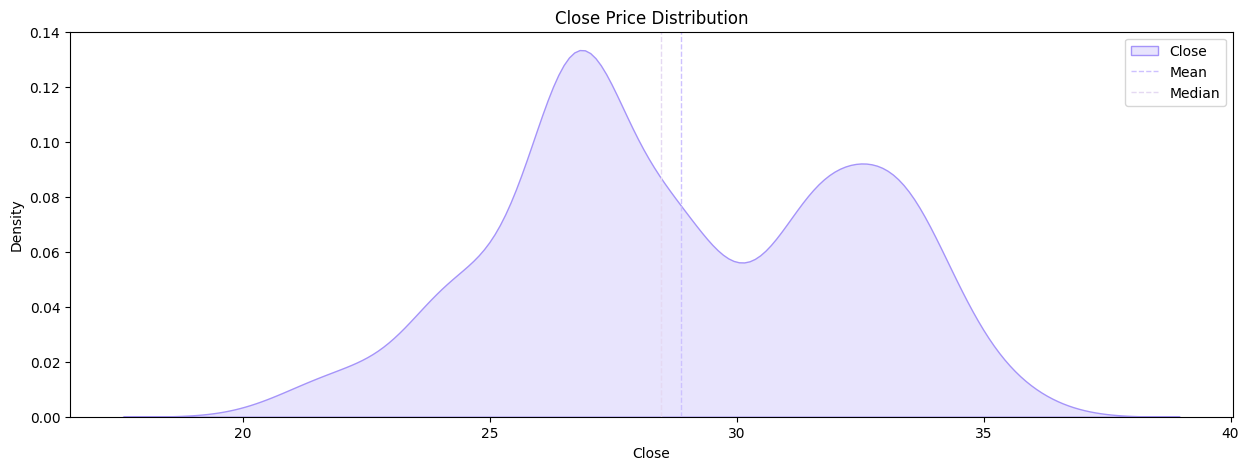

In [16]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df['Close'], color=color1, shade=True, label='Close')
plt.axvline(df['Close'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Mean', zorder=1)
plt.axvline(df['Close'].median(), color=color3, linestyle='dashed', linewidth=1, label='Median', zorder=1)
plt.legend()
plt.title('Close Price Distribution')
plt.show()

#### Observation:
- The distribution of the Close price appears unimodal.
- The mean and median lines are nearly overlapping, indicating a symmetric distribution.

#### Insight:
The stock's closing prices are distributed in a balanced manner, with few extreme deviations. This suggests that the price movement is stable without heavy skewness.

#### **2** - Close Price Over Time
- Line plot showing how the closing price has changed over time.
- Mean and median lines help identify long-term trends and price movements.

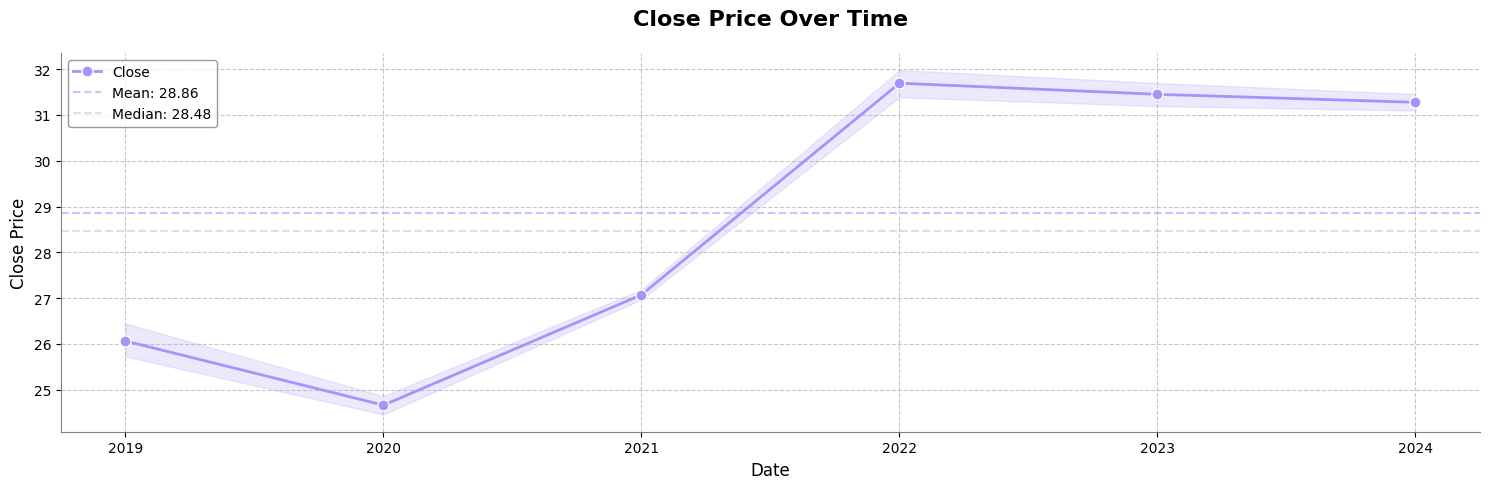

In [17]:
plt.figure(figsize=(15, 5))
# Line plot for Close over Year
sns.lineplot(x='Year', y='Close', data=df, color=color1, linewidth=2, label='Close',  marker='o',markersize=8,markeredgecolor='white', 
             markeredgewidth=1 ) 
# Mean line
plt.axhline(df['Close'].mean(), color=color2, linestyle='--', linewidth=1.5, label=f'Mean: {df["Close"].mean():.2f}', zorder=1)
# median line
plt.axhline(df['Close'].median(), color=color3, linestyle='--', linewidth=1.5, label=f'Median: {df["Close"].median():.2f}', zorder=1)
plt.title('Close Price Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.tight_layout()
plt.show()

#### Observation:
- The line plot of Close prices shows a clear upward trend over the years.
- Mean and median lines indicate that the central tendency of prices is increasing.

#### Insight:
The stock exhibits long-term upward momentum, with seasonal fluctuations likely contributing to periodic peaks and troughs. This trend supports the potential for a predictive model that leverages time-based features.

#### **3** - Rolling Mean Trend
A 7-day rolling average is plotted alongside actual closing prices to observe short-term trends and smooth fluctuations.

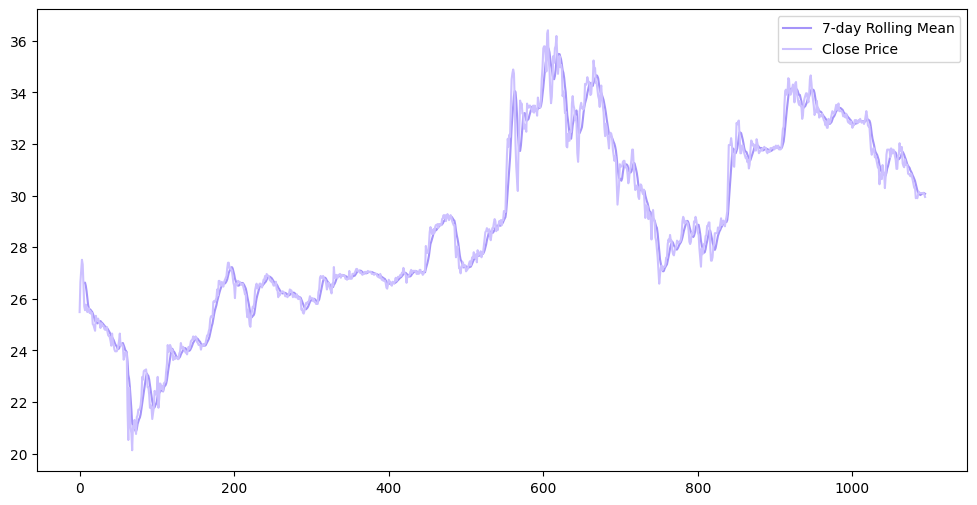

In [18]:
df['Close'].rolling(window=7).mean().plot(figsize=(12, 6), label='7-day Rolling Mean', color=color1)
df['Close'].plot(label='Close Price', color=color2)  
plt.legend()  
plt.show()  

#### Observation:
A 7-day rolling mean smooths out daily volatility and follows the overall trend of the Close price.
#### Insight:
The rolling average is a useful indicator for identifying long-term trends by filtering out noise, which can be critical for understanding underlying market behavior.

#### **4** - Pairplot for Feature Relationships
Pairwise comparison of important stock indicators like `Close`, `Volume`, `RSI`, `MACD`, `BB_Middle_Band`, `BB_Upper_Band`, `BB_Lower_Band` to identify relationships.

<Figure size 1500x500 with 0 Axes>

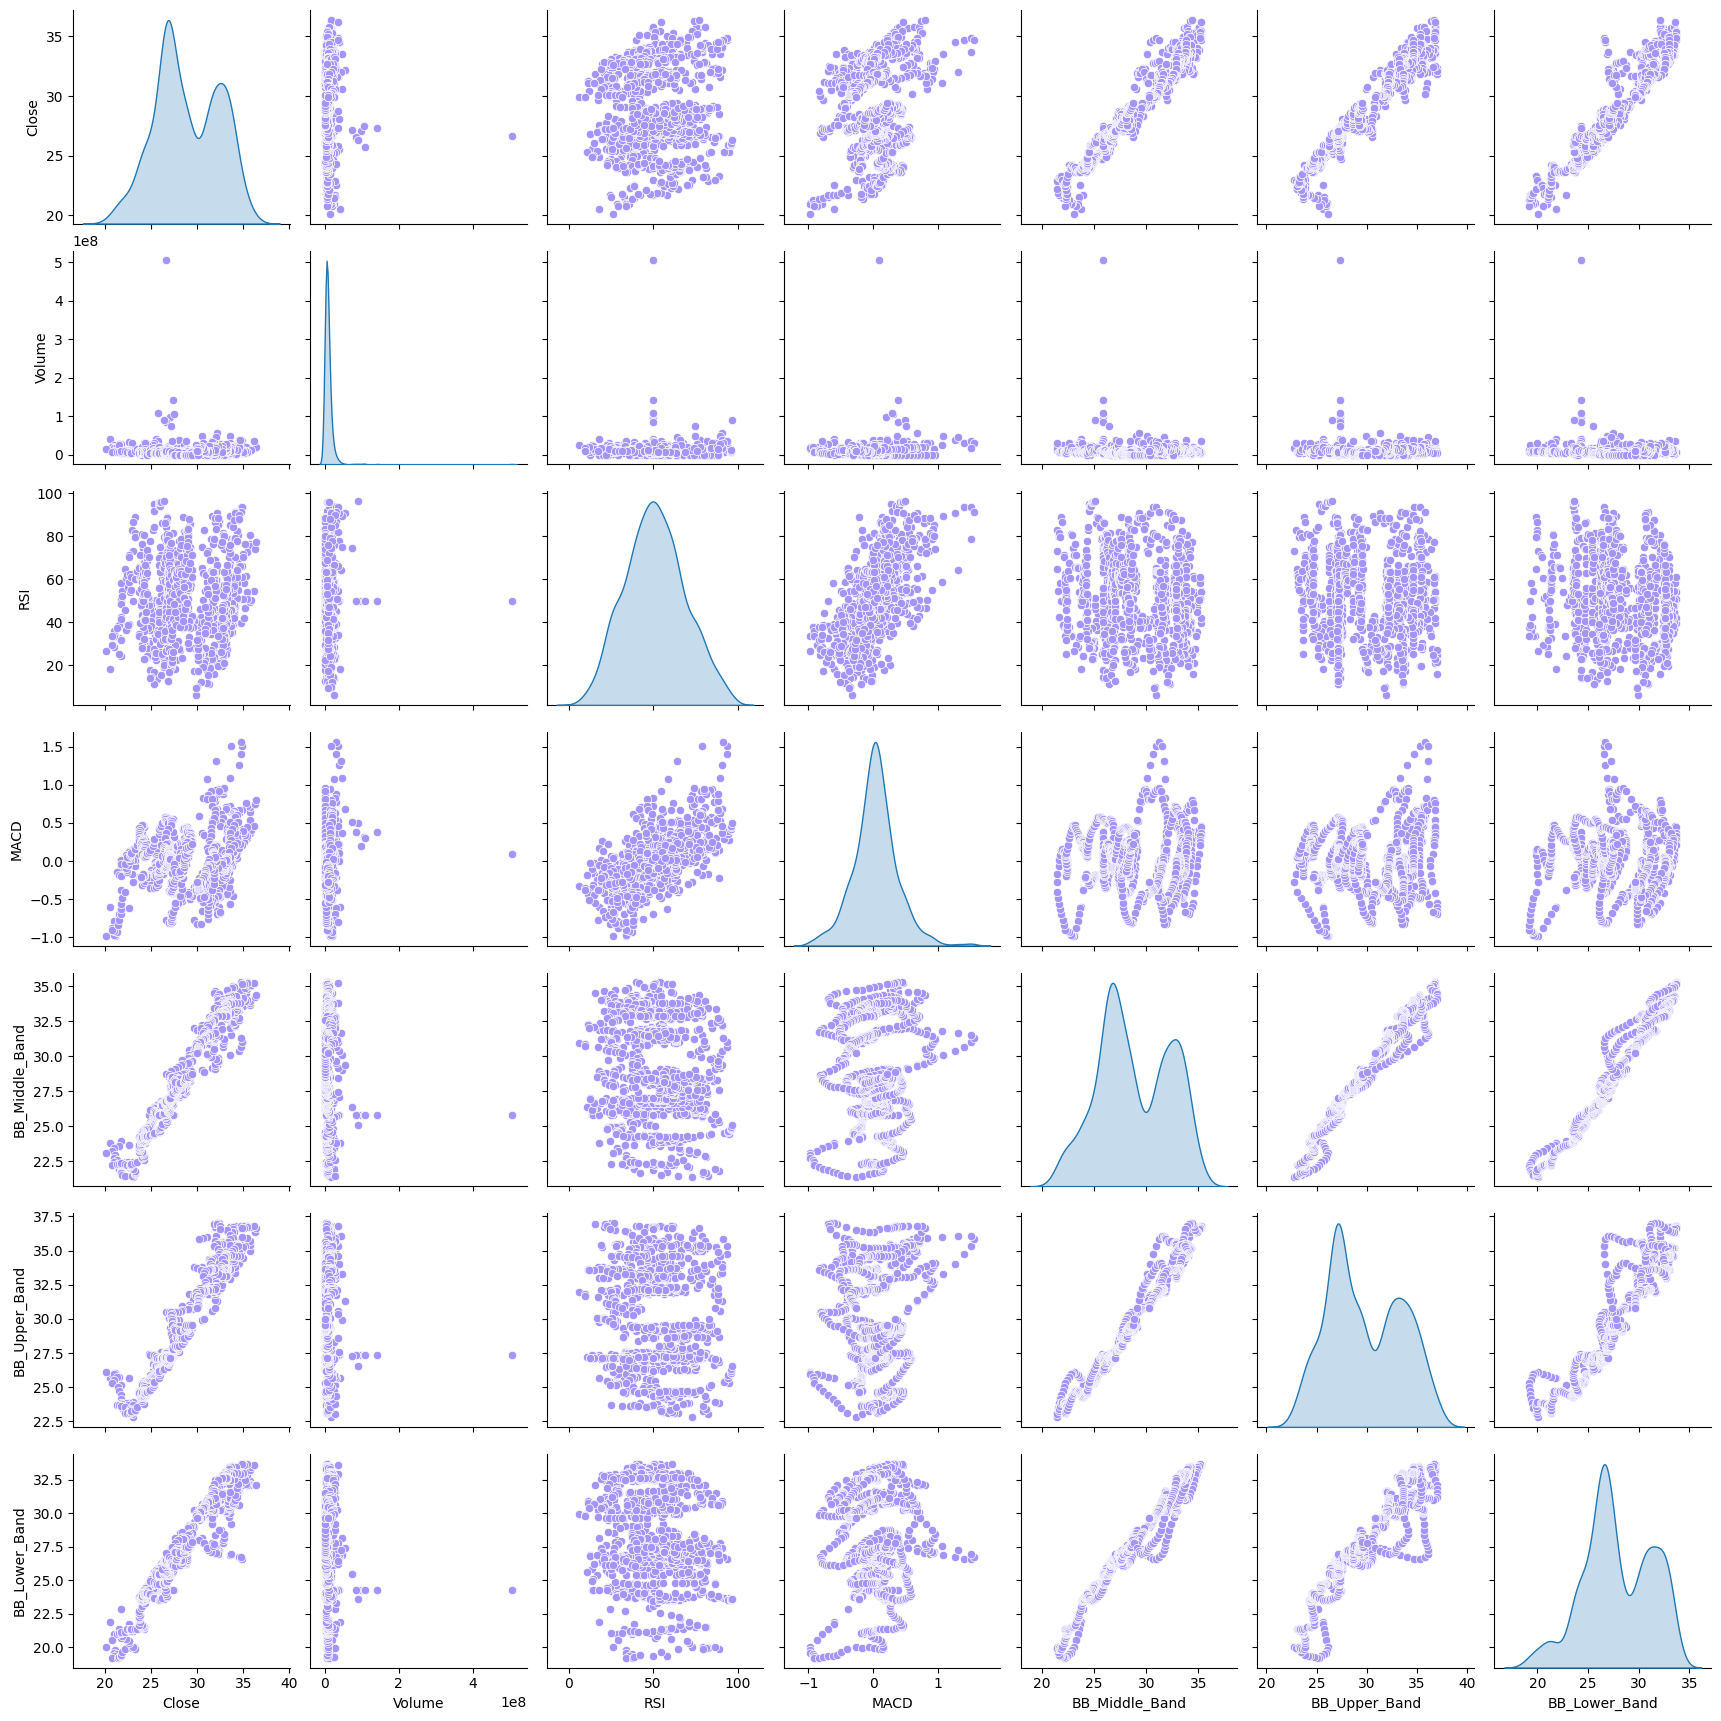

In [19]:
plt.figure(figsize=(15, 5))
sns.pairplot(df[['Close', 'Volume', 'RSI', 'MACD', 'BB_Middle_Band', 'BB_Upper_Band', 'BB_Lower_Band']], diag_kind='kde', plot_kws={'color': color1, 'edgecolor': 'white', 'linewidth': 0.5})  
plt.show() 

### Observation:
The pairplot shows relationships among Close, Volume, RSI, MACD, and Bollinger Bands.
Some features like the Bollinger Bands correlate strongly with Close price, while others have more diffuse relationships.

### Insight:
These relationships help in identifying which features have the most influence on stock price movements, aiding in feature selection and further model refinement.

#### **5** - Boxplots for Feature Distributions
Boxplots for key features to identify outliers and understand data distribution.

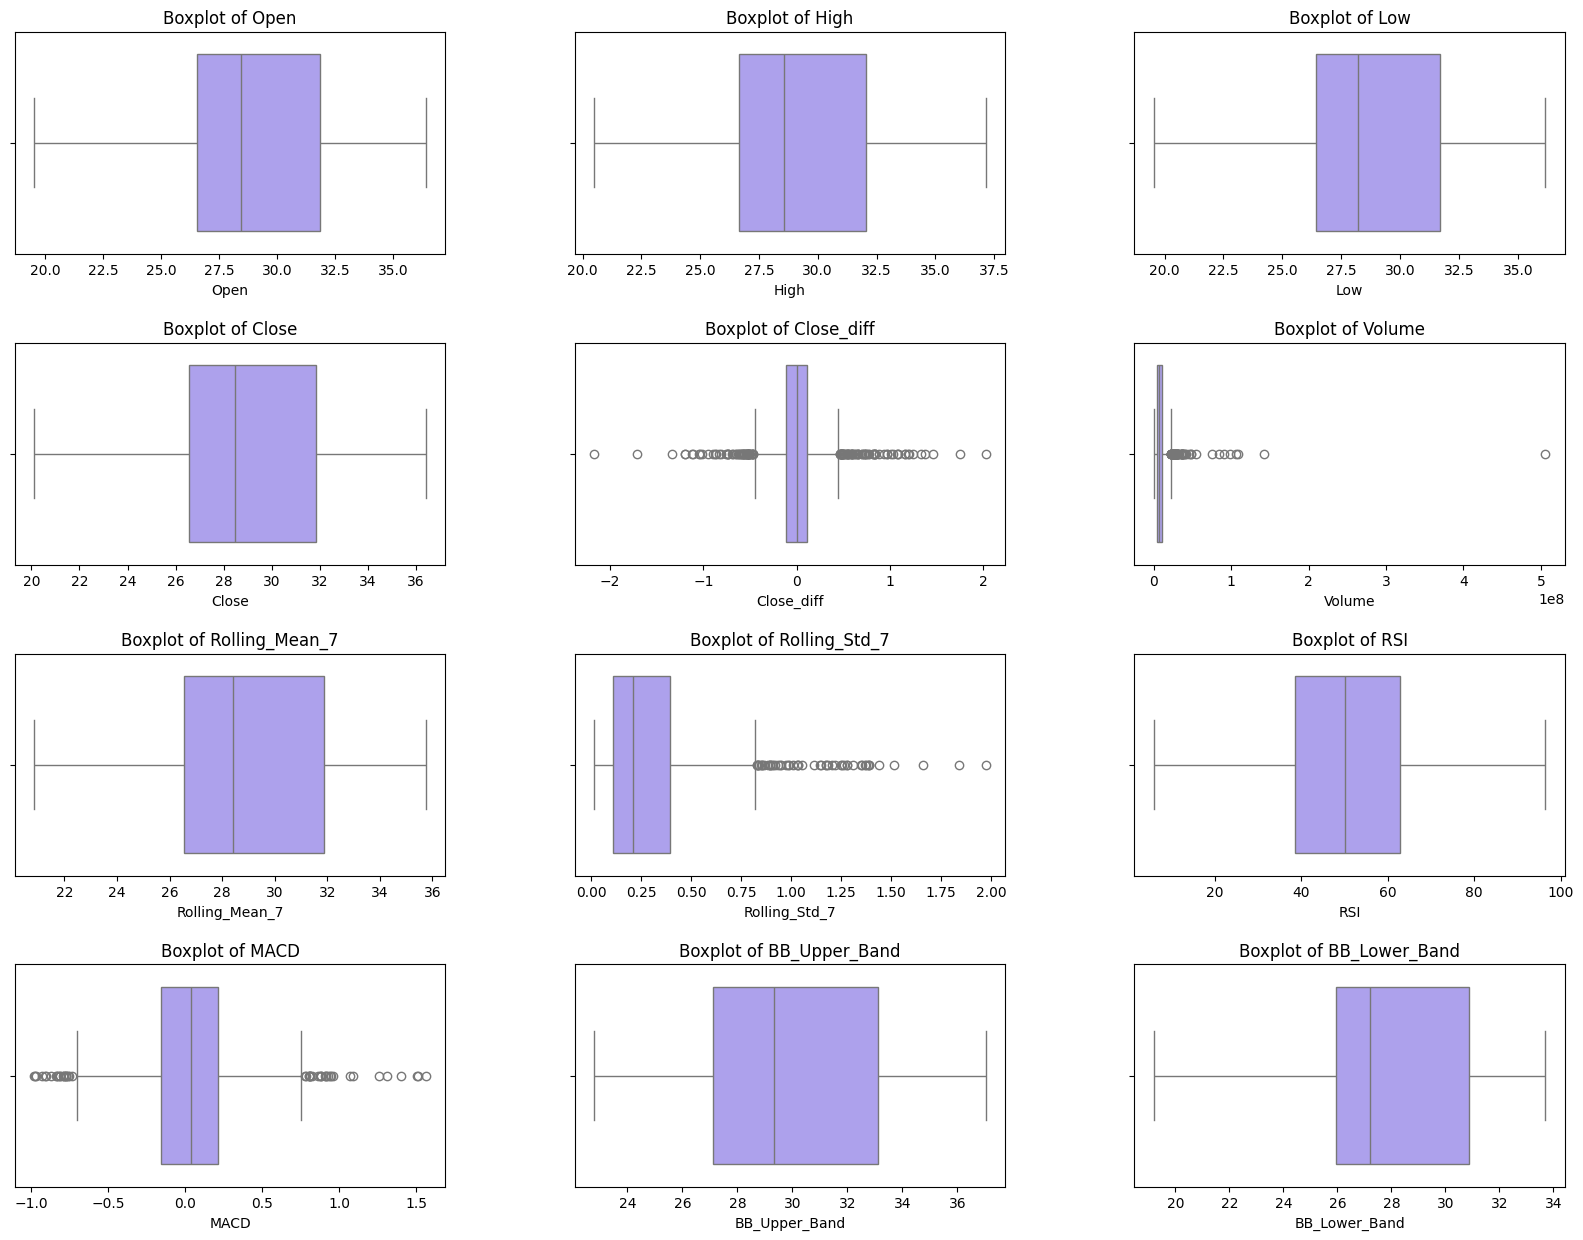

In [20]:
features_to_check = ['Open', 'High', 'Low', 'Close', 'Close_diff', 'Volume',  
                     'Rolling_Mean_7', 'Rolling_Std_7', 'RSI', 'MACD', 'BB_Upper_Band', 'BB_Lower_Band']

fig , axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten() 
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i], color=color1)
    axes[i].set_title(f'Boxplot of {feature}')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout
plt.show()

#### Observation:
Boxplots reveal the distribution and outliers for key features such as Open, High, Low, Close, Volume, RSI, and MACD.
Notable outliers are present in Volume and Close_diff, indicating occasional spikes.

#### Insight:
Outliers in Volume may reflect significant trading events. Recognizing these is important for risk analysis and may guide further data transformation if needed.

#### **6** - Outliers Over Time
Time-series visualization of Volume, Rolling Standard Deviation, and MACD to observe patterns in potential outliers.
The top 10 highest trading volumes are listed to detect unusual spikes.

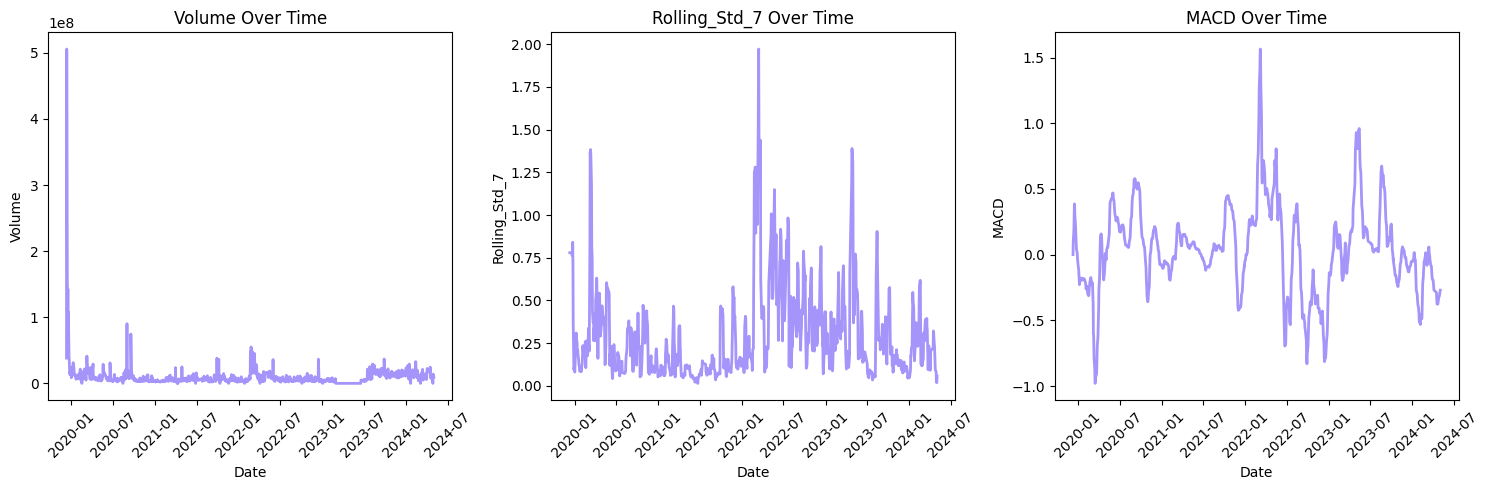

1      505692621
4      142672245
6      108120197
3      105973907
2       98349281
178     90226629
5       83822621
191     74552211
554     55009065
552     48049145
Name: Volume, dtype: int64

In [21]:

outliers_features = ['Volume', 'Rolling_Std_7', 'MACD']
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
for i, feature in enumerate(outliers_features):
    axes[i].plot(df['Date'], df[feature], color= color1, linewidth=2)  
    axes[i].set_title(f'{feature} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()
df["Volume"].sort_values(ascending=False).head(10)

### Observation:

Time-series plots for Volume, Rolling_Std_7, and MACD show that outlier events occur at specific intervals.

### Insight:

Periods with unusual spikes in volume or volatility may coincide with external events like earnings announcements, market shocks. These periods can be further analyzed to understand their impact on model predictions.

#### **7** -  Monthly Seasonality in Stock Prices
 Analyzing average closing prices per month to identify seasonal trends and recurring patterns.

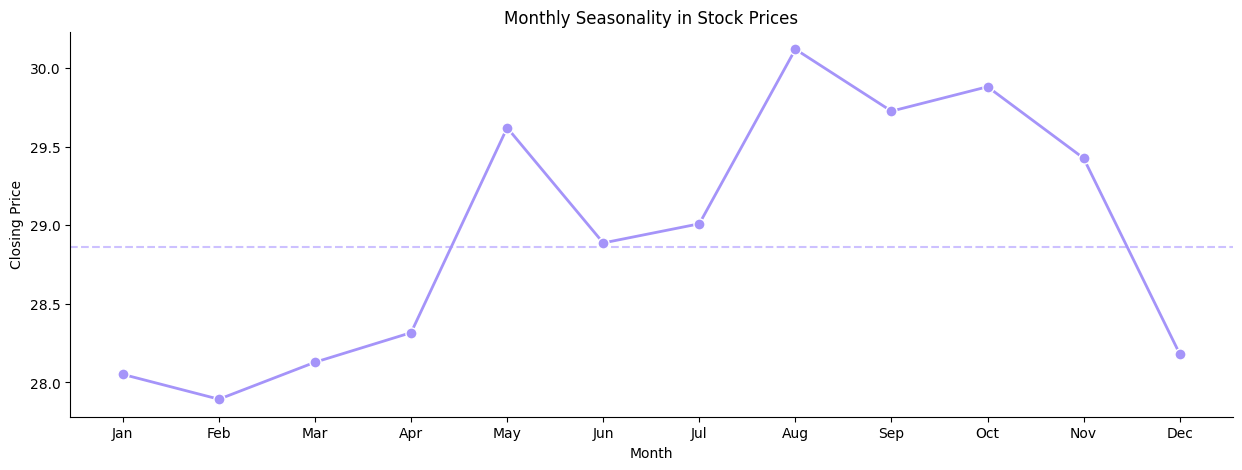

In [22]:
df['Month'] = df['Date'].dt.month
# Plot average close price per month
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="Month", y="Close", marker='o', markersize=8,markeredgecolor='white', linewidth=2, color=color1,
             markeredgewidth=1, ci=None)
# Mean line
plt.axhline(df['Close'].mean(), color=color2, linestyle='--', linewidth=1.5, label=f'Mean: {df["Close"].mean():.2f}', zorder=1)
sns.despine()
plt.xlabel("Month")
plt.ylabel("Closing Price")
plt.title("Monthly Seasonality in Stock Prices")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### Observation:

The line plot of average Close prices by Month shows distinct seasonal patterns; some months consistently have higher prices than others.

#### Insight:

Seasonal trends are evident in the data, suggesting that including date-based features like Month or Quarter can enhance the model’s ability to capture cyclical behavior.

#### **8** -  Correlation Heatmap 
Heatmap to analyze correlations between numerical features and detect strong relationships among variables.

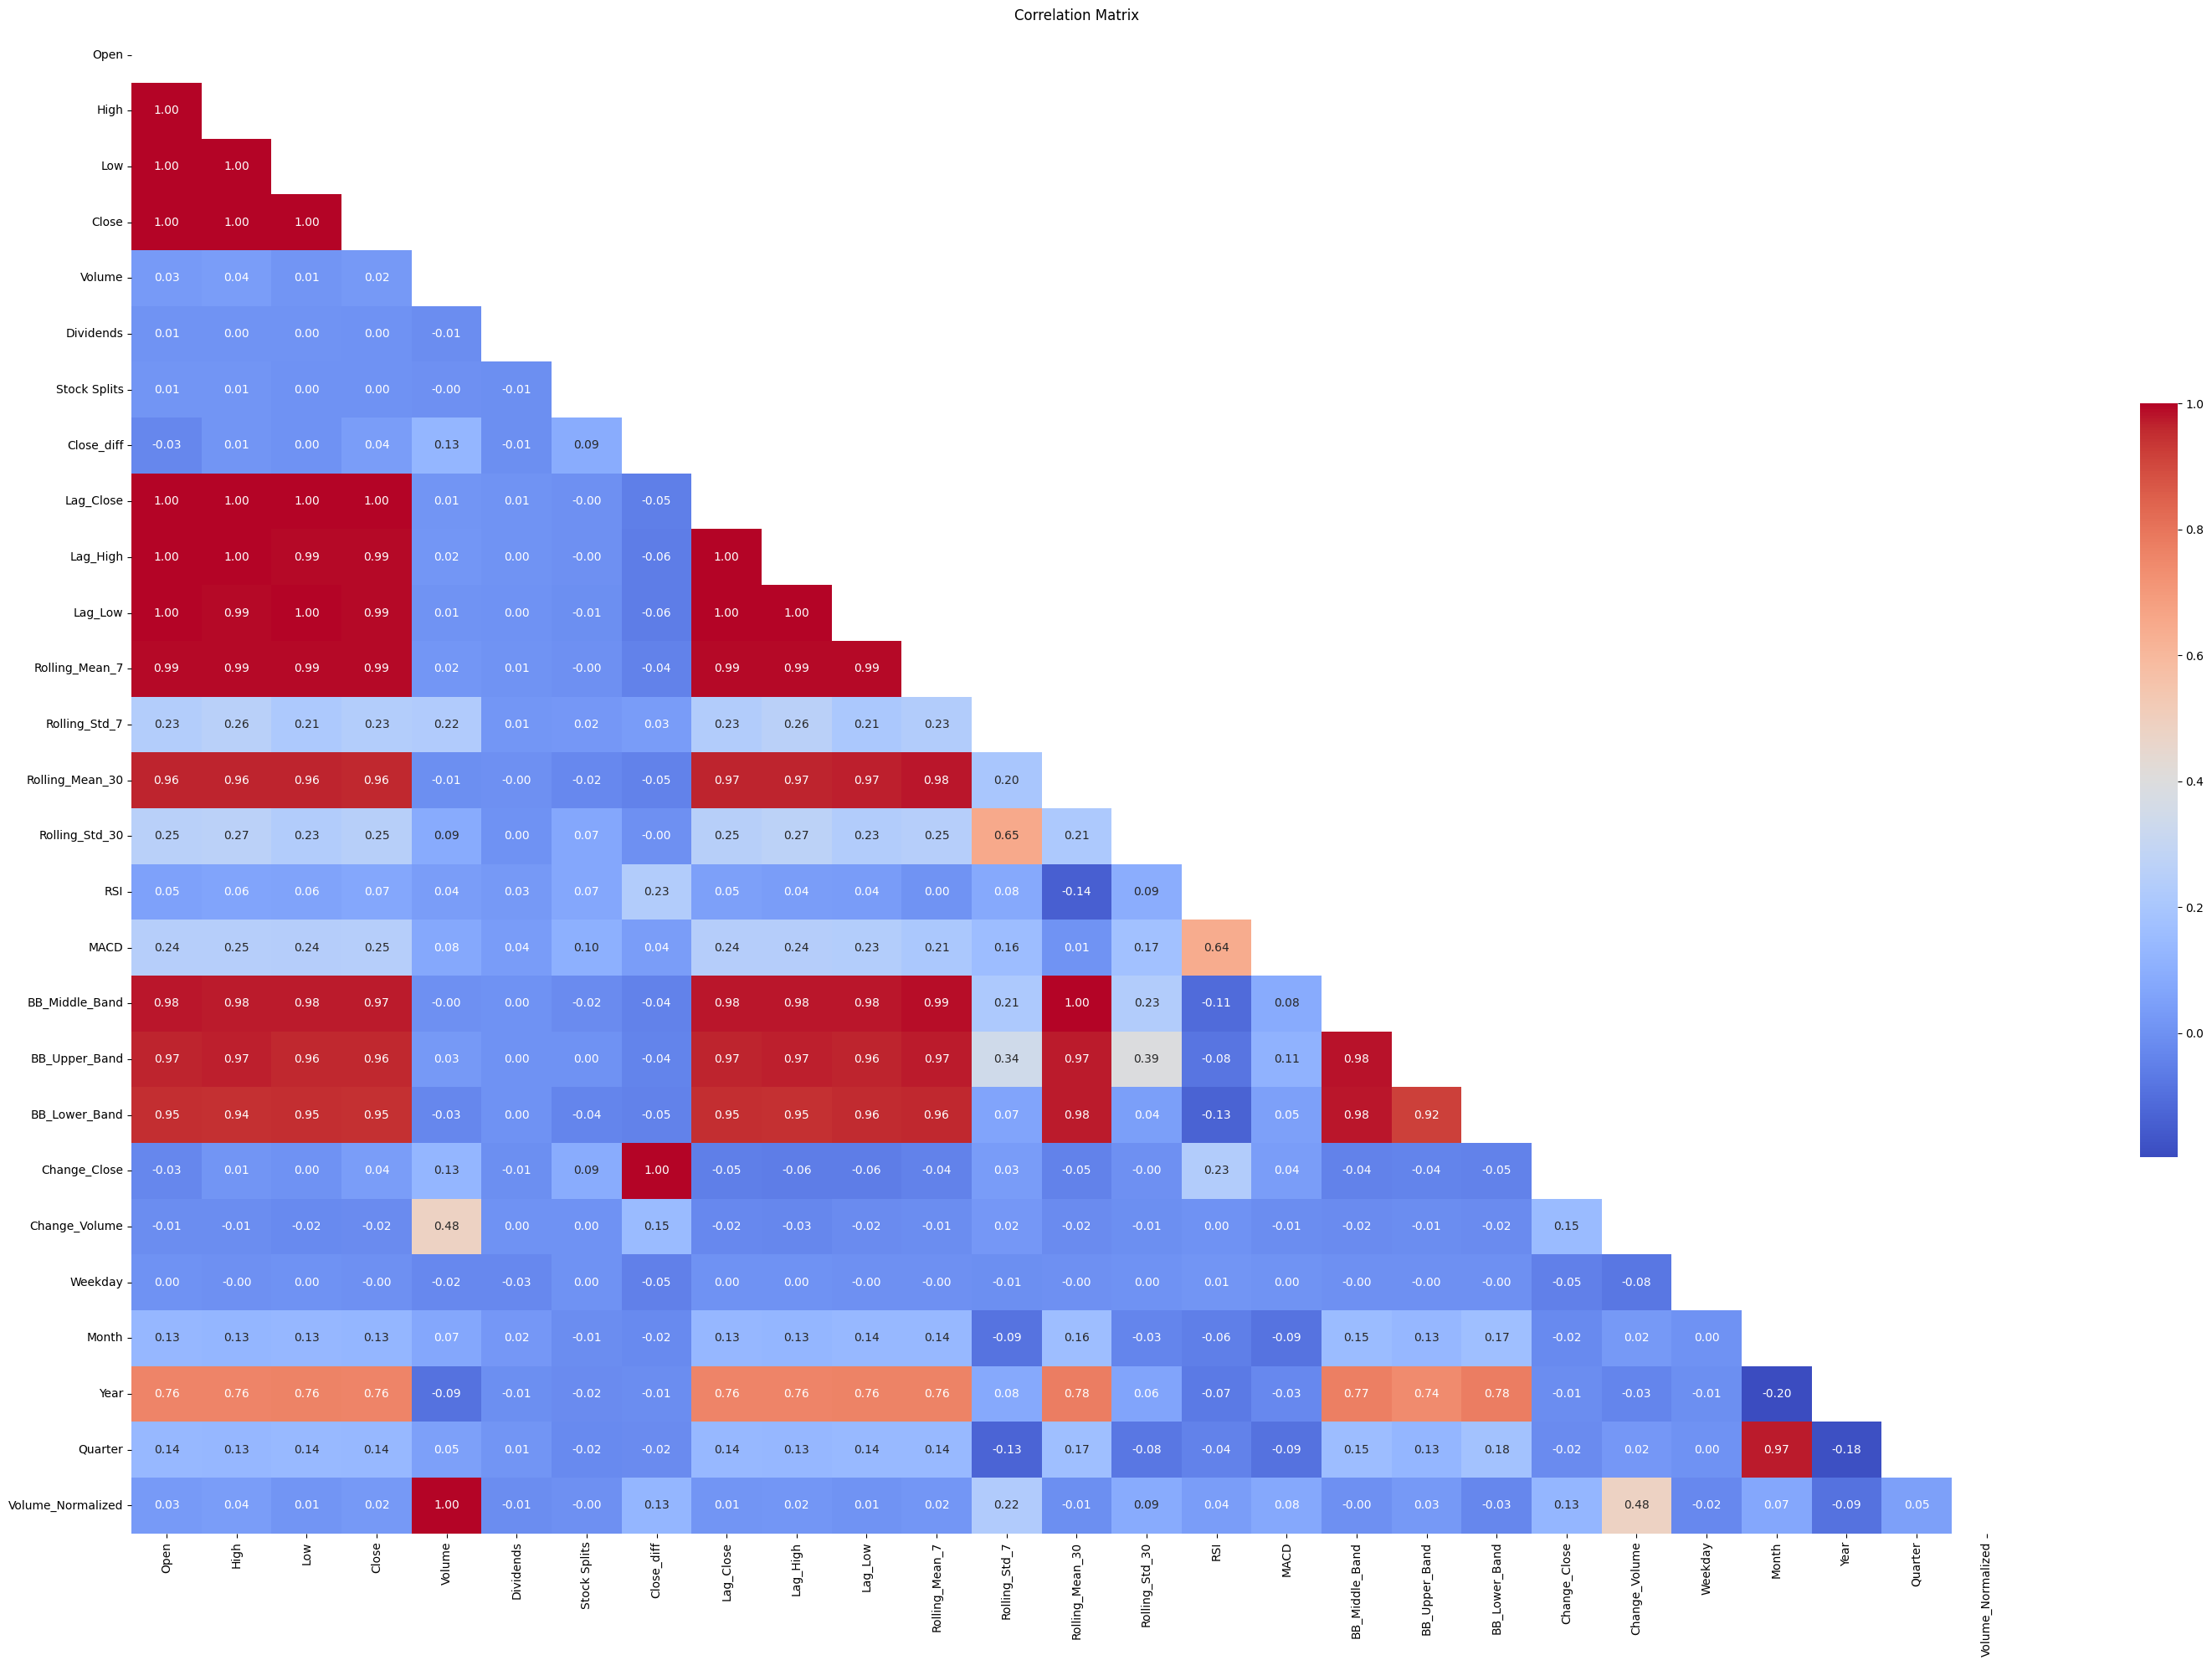

In [23]:
plt.figure(figsize=(30, 20))
sns.heatmap(
    data=df.select_dtypes(include=['number']).corr(), mask = np.triu(np.ones_like(df.select_dtypes(include=['number']).corr(), dtype=bool)) , 
    cmap='coolwarm', annot=True, fmt='.2f', square=False, annot_kws={"size": 10}, cbar_kws={'shrink': 0.5} )
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### Observation:

The heatmap of numerical features indicates strong correlations between the basic price features (Open, High, Low, Close) and moderate correlations among technical indicators.

#### Insight:

Identifying highly correlated features helps reduce multicollinearity. This understanding informs potential feature reduction or the creation of composite features, improving model performance.

### **Summary:**

The exploratory data analysis (EDA) shows that the dataset is clean and organized. It has clear trends, repeating seasonal patterns, and consistent distributions. By checking for outliers and studying how features relate to each other, we can see that the engineered features are high quality. These findings support our next steps in building a model. They also highlight why it’s important to use time-related and technical indicators to make strong predictions about stock prices.

## Data Preprocessing & Feature Selection

This section outlines the steps taken to clean the data, remove erroneous outliers, and select relevant features for modeling.

The highest Volume value was identified as an error. So Remove the row with the maximum Volume.

In [24]:
df = df.drop(index=df['Volume'].idxmax())

The Date column is needed for later analysis and visualization, so it is extracted before dropping.

In [25]:
date_column = df['Date']
df = df.drop(columns=['Date'])

#### Feature Selection

We assess feature importance and multicollinearity by calculating the variance (via Variance Inflation Factor) for each feature.

In [26]:

def calculate_vairance(df):
    var_features = []
    var_features = df.columns
    variance = [variance_inflation_factor(df.values, index) for index in range(df.shape[1])]

    df_variance = pd.DataFrame({'feature': var_features , 'variance' : variance})

    return df_variance

print(calculate_vairance(df))

              feature      variance
0                Open  1.280547e+03
1                High  1.022922e+03
2                 Low  8.805053e+02
3               Close  2.322735e+04
4              Volume  2.304388e+07
5           Dividends  1.021644e+00
6        Stock Splits  1.174988e+00
7          Close_diff           inf
8           Lag_Close  2.377523e+04
9            Lag_High  6.746889e+02
10            Lag_Low  4.818571e+02
11     Rolling_Mean_7  3.975636e+02
12      Rolling_Std_7  3.091187e+00
13    Rolling_Mean_30  7.638609e+02
14     Rolling_Std_30  5.849468e+00
15                RSI  3.440363e+00
16               MACD  1.871547e+01
17     BB_Middle_Band           inf
18      BB_Upper_Band           inf
19      BB_Lower_Band           inf
20       Change_Close           inf
21      Change_Volume  2.386499e+00
22            Weekday  1.032247e+00
23              Month  2.098553e+01
24               Year  4.425666e+00
25            Quarter  2.136403e+01
26  Volume_Normalized  1.333

#### Observation:
Some features with very high variance (i.e., Close_diff, BB_Middle_Band, BB_Upper_Band, BB_Lower_Band, and Change_Close) are likely dominated by outliers. These outliers are real signals in some cases; however, in this instance, they are treated as noise.

#### Action:
Drop these high variance features from the dataset.

In [27]:
high_variance_features = ['Close_diff', 'BB_Middle_Band', 'BB_Upper_Band' , 'BB_Lower_Band', 'Change_Close']
for feature in high_variance_features:
   df.drop(columns=feature, inplace=True)

In [28]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Lag_Close,Lag_High,Lag_Low,...,Rolling_Mean_30,Rolling_Std_30,RSI,MACD,Change_Volume,Weekday,Month,Year,Quarter,Volume_Normalized
0,25.485229,25.485229,25.485229,25.485229,38289394,0.0,0.0,25.485229,25.485229,25.485229,...,25.582973,0.72527,49.624111,0.000000,467403227.0,2,12,2019,4,1.580604
2,26.860858,27.150462,26.643654,27.078060,98349281,0.0,0.0,26.643652,28.019275,26.064442,...,25.582973,0.72527,49.624111,0.198411,-407343340.0,6,12,2019,4,4.865806
3,27.150464,27.584871,27.150464,27.512470,105973907,0.0,0.0,27.078060,27.150462,26.643654,...,25.582973,0.72527,49.624111,0.313853,7624626.0,0,12,2019,4,5.282864
4,27.548665,27.621067,27.150460,27.331463,142672245,0.0,0.0,27.512470,27.584871,27.150464,...,25.582973,0.72527,49.624111,0.386283,36698338.0,1,12,2019,4,7.290218
5,27.150463,27.222865,26.571253,26.571253,83822621,0.0,0.0,27.331463,27.621067,27.150460,...,25.582973,0.72527,49.624111,0.377985,-58849624.0,2,12,2019,4,4.071216


#### Train-Test-Split
With a clean dataset and selected features, we now split the data for modeling.

In [29]:
train_size = int(len(df) * 0.70)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

print(f"Train data shape : {train_data.shape}")
print(f"Test data shape : {test_data.shape}")

Train data shape : (765, 22)
Test data shape : (329, 22)


##### Define Features (X) and Target (y)

In [30]:
X_train = train_data.drop(columns=['Close'])
y_train = train_data['Close']

X_test = test_data.drop(columns=['Close'])
y_test = test_data['Close']

# Conclusion

The dataset is in excellent condition for modeling:
- **Clean Data:** No missing values or duplicates remain, and data types are appropriate.
- **No Outliers:** Any outliers present are genuine market signals, adding valuable information.
- **Feature Engineering:**  The dataset comes pre-equipped with all necessary features—lag values, rolling statistics, and technical indicators—integrated prior to loading.
- **Overall Readiness:** With proper cleaning and preprocessing the dataset is ready for accurate and reliable stock price prediction.


## Customer Evaluation Functions

Define functions to check feature importance of model.

In [31]:
def check_feature_importance(model, features, model_name):
    if model_name.lower() == 'linear regression' or hasattr(model, 'coef_'): 
        importances = np.abs(model.coef_.ravel())  
    elif hasattr(model, 'feature_importances_'):  
        importances = model.feature_importances_  
    else:
        raise ValueError("Model type not supported for feature importance")
    
    feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})  
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for {model_name}')
    plt.xticks(rotation=90)
    plt.show()

Define functions to evaluate model performance.

In [32]:
def evaluate(model, pred, y_test ):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)

    print(f"Model Name: {model}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")

## Train Models 

## Model Training: Linear Regression

### Training Process
- A Linear Regression model was trained using engineered features.
- The target variable is `Close` price.
- Features were selected based on domain knowledge and feature importance analysis.

### Model Performance
- **Mean Squared Error (MSE):** 0.0146
- **Root Mean Squared Error (RMSE):** 0.1210
- **Mean Absolute Error (MAE):** 0.0904
- **R-Squared Score:** 0.9958 (Excellent Fit)

### Observations
- The model explains **99.58% of the variance** in closing prices.
- Errors are minimal, indicating accurate predictions.
- Actual vs. Predicted values show a near-perfect linear relationship.


Model Name: LinearRegression
Mean Squared Error: 0.0146
Root Mean Squared Error: 0.1210
R-squared: 0.9958
Mean Absolute Error: 0.0904


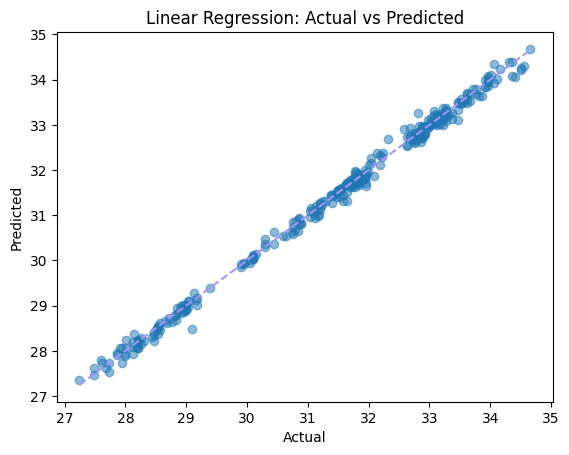

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate('LinearRegression', y_test, y_pred)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' , color=color1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## Feature Importance Analysis

### Key Insights
- The most influential features in predicting `Close` price are:
  - `High`
  - `Low`
  - `Open`
- Other relevant features include:
  - `Stock Splits`
  - `MACD`
  - `Dividends`
- Rolling statistics and technical indicators have lower influence.

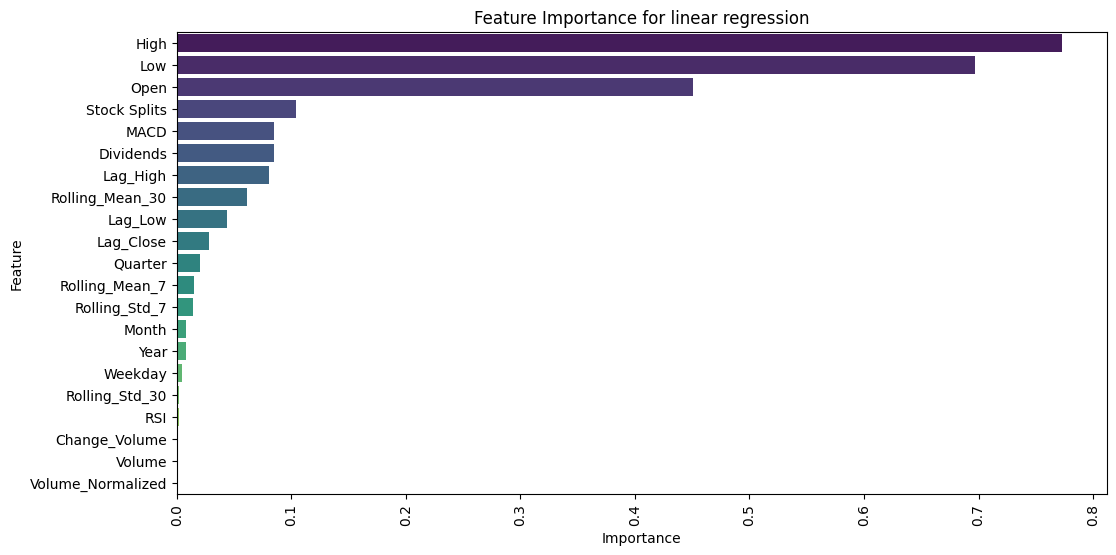

In [34]:
check_feature_importance(lr, X_train , 'linear regression')

### Decision Tree Model Performance 

- **MSE:** 0.0648  
- **RMSE:** 0.2545  
- **R²:** 0.9811  
- **MAE:** 0.1900  

 Higher error compared to Linear Regression.  
 Possible overfitting—further analysis needed.  


In [35]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate('DecisionTree', y_test, y_pred)

Model Name: DecisionTree
Mean Squared Error: 0.0638
Root Mean Squared Error: 0.2526
R-squared: 0.9815
Mean Absolute Error: 0.1932


### Random Forest Model Performance 

- **MSE:** 0.0300  
- **RMSE:** 0.1733  
- **R²:** 0.9913  
- **MAE:** 0.1334  

  Lower error than Decision Tree, higher accuracy.  
  Handles non-linearity better than Linear Regression.  
  A solid candidate for final model selection! 


In [36]:
rm = RandomForestRegressor()
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)

evaluate('RandomForest', y_test, y_pred)

Model Name: RandomForest
Mean Squared Error: 0.0320
Root Mean Squared Error: 0.1788
R-squared: 0.9907
Mean Absolute Error: 0.1393


### Model Performance Comparison
Linear Regression achieved the highest R² (0.9958) with the lowest error, making it the best-performing model.

Random Forest performed well (R² = 0.9912) and captured nonlinearity effectively, balancing accuracy and robustness.

Decision Tree had the highest errors and lowest R² (0.9774), indicating overfitting and weaker generalization.

Conclusion
Linear Regression and Random Forest are the top choices. Random Forest handles nonlinearity better, while Linear Regression remains a strong baseline. Further tuning could optimize performance.

In [37]:
result = {}
def final_evaluation(name , model, X_train, y_train, X_test, y_test):
         model.fit(X_train, y_train)
         y_pred = model.predict(X_test)
         
         result[name] = {
               'mae' : mean_absolute_error(y_test, y_pred),
               'mse' : mean_squared_error(y_test, y_pred),
               'r2_score' : r2_score(y_test, y_pred)
             }

final_evaluation('LinearRegression',lr,X_train, y_train, X_test,  y_test)
final_evaluation('DecisionTree',dt,X_train, y_train, X_test,  y_test)
final_evaluation('RandomForest',rm,X_train, y_train, X_test,  y_test)

df_model_results = pd.DataFrame(result).T
print(df_model_results)


                       mae       mse  r2_score
LinearRegression  0.090442  0.014650  0.995815
DecisionTree      0.267839  0.131570  0.962410
RandomForest      0.133954  0.030058  0.991412


### Bar Plot For Model Comparison

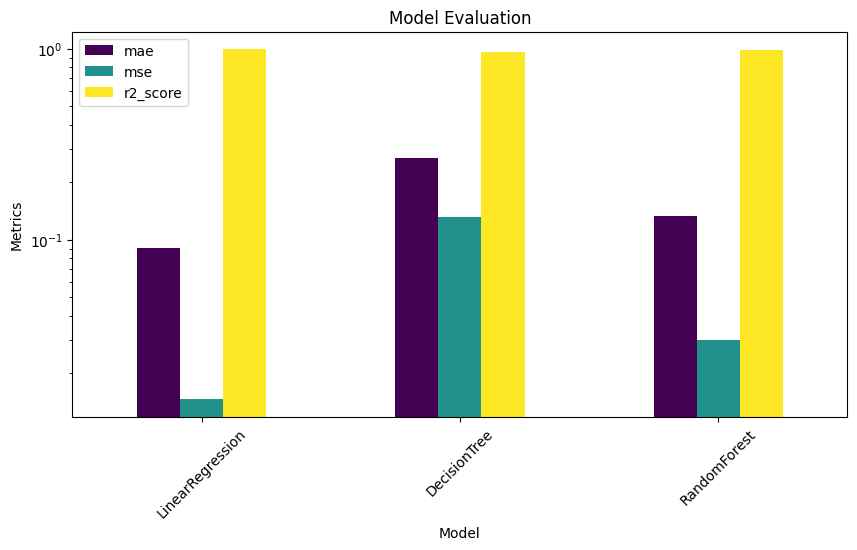

In [38]:
df_model_results.plot(kind='bar', figsize=(10,5),  colormap='viridis')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Model Evaluation')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

### Conclusion
Linear Regression performed the best with the highest R² (0.9958) and the lowest error, making it the most reliable model. While Random Forest also showed strong performance, we will choose Linear Regression for its simplicity, interpretability, and effectiveness in capturing relationships in the data.

### Feature Refinement
Low-importance features identified by Linear Regression were dropped to enhance model efficiency and prevent noise. This step ensures the model focuses only on the most relevant features, improving interpretability and reducing complexity.

In [39]:
Irrelevant_cols =['Volume_Normalized' , 'Volume' , 'Change_Volume', 'Dividends'  , 'Weekday' , 'Rolling_Std_30' , 'Quarter']
X_train = X_train.drop(columns=Irrelevant_cols)
X_test = X_test.drop(columns=Irrelevant_cols)

In [40]:
X_train.columns

Index(['Open', 'High', 'Low', 'Stock Splits', 'Lag_Close', 'Lag_High',
       'Lag_Low', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_30', 'RSI',
       'MACD', 'Month', 'Year'],
      dtype='object')

### Retraining Linear Regression Model
After removing low-importance features, the Linear Regression model was retrained. The updated performance metrics show a slight improvement, confirming that eliminating irrelevant features helped refine the model without compromising accuracy.

Model Name: LinearRegression
Mean Squared Error: 0.0147
Root Mean Squared Error: 0.1214
R-squared: 0.9958
Mean Absolute Error: 0.0903


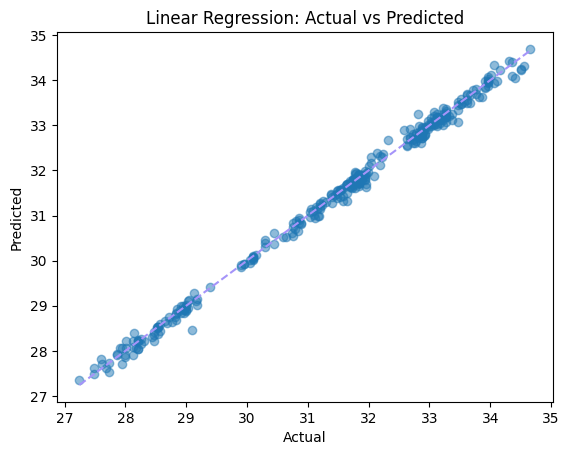

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate('LinearRegression', y_test, y_pred)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--' , color=color1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

### Prediction vs. Actual Prices
A DataFrame was created to store the predicted and actual prices along with their corresponding dates. The plotted graph visually confirms that the predicted values closely follow the actual prices, indicating that the model is performing well in capturing price trends.

In [42]:
date_column_test = date_column.loc[X_test.index].reset_index(drop=True) 
date_column_test = pd.to_datetime(date_column_test) 

df_pred = pd.DataFrame({'Date': date_column_test,  'Actual': y_test.values,  'Predicted': y_pred })
df_pred = df_pred.reset_index(drop=True)
print(df_pred)

                         Date     Actual  Predicted
0   2023-01-03 00:00:00+03:00  28.256075  28.266426
1   2023-01-04 00:00:00+03:00  27.860577  27.904010
2   2023-01-05 00:00:00+03:00  27.728745  27.535759
3   2023-01-08 00:00:00+03:00  27.684799  27.629650
4   2023-01-09 00:00:00+03:00  27.860577  27.937198
..                        ...        ...        ...
324 2024-04-28 00:00:00+03:00  30.100000  30.034321
325 2024-04-29 00:00:00+03:00  30.100000  30.103067
326 2024-04-30 00:00:00+03:00  30.100000  30.005776
327 2024-05-01 00:00:00+03:00  30.049999  29.938140
328 2024-05-02 00:00:00+03:00  29.950001  29.929318

[329 rows x 3 columns]


### Visualization of Model Predictions
The plot compares the actual prices (blue dots) with the predicted prices (red crosses). The strong alignment between the two suggests that the model effectively captures the underlying trend in price movements.

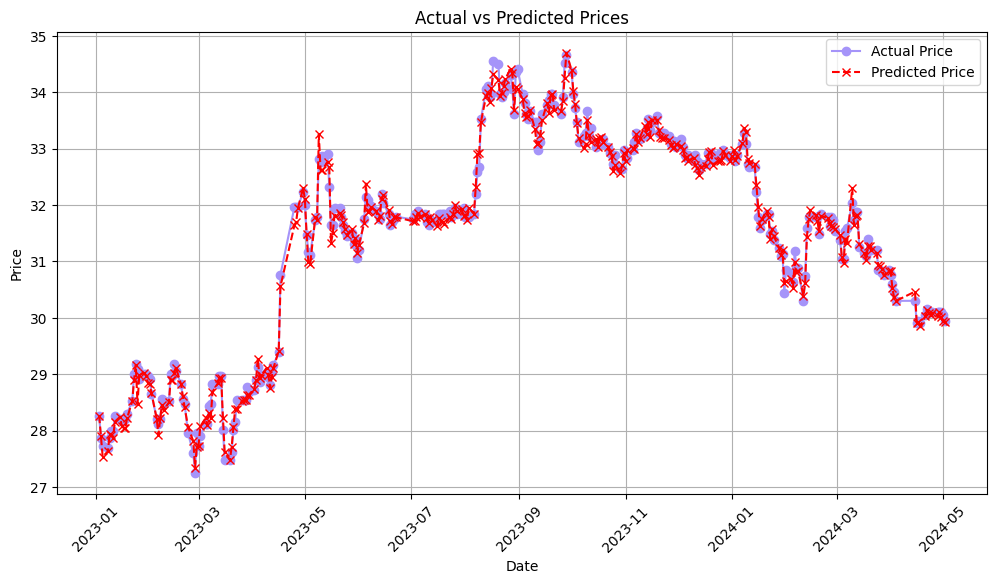

In [43]:
df_pred['Date'] = pd.to_datetime(df_pred['Date'])

plt.figure(figsize=(12,6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual Price', marker='o', linestyle='-', color=color1)
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted Price', marker='x', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Cross-Validation Results
To ensure the model's performance is consistent across different data splits, K-Fold cross-validation was applied. The R² scores across folds show high consistency, with a mean R² score of 0.9985, indicating that the model generalizes well to unseen data.

In [44]:

kf = KFold(n_splits=20, shuffle=True, random_state=1)
scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring="r2")  
print(f"Cross-Validation R^2 Scores: {scores}")
print(f"Mean R^2 Score: {np.mean(scores):.4f}")

Cross-Validation R^2 Scores: [0.99835229 0.9969969  0.99809212 0.99815758 0.99878199 0.99828173
 0.99910435 0.99832583 0.99851718 0.99950275 0.99810579 0.99893596
 0.99880438 0.99871384 0.99922981 0.99872145 0.99803674 0.99776571
 0.99826236 0.9987418 ]
Mean R^2 Score: 0.9985


### Model Saving
The trained Linear Regression model was saved using Joblib for future use. This allows easy loading and reuse without retraining.

In [45]:
joblib.dump(lr, 'linear_regression_model.pkl')
print("Model saved as linear_regression_model.pkl")

Model saved as linear_regression_model.pkl


# Final Remarks
In this project, we successfully built a Linear Regression model to predict stock prices with high accuracy. After evaluating multiple models, Linear Regression demonstrated the best performance. By removing less important features, we further improved its efficiency.

Cross-validation confirmed that the model performs consistently across different data splits, ensuring its reliability for real-world predictions. Finally, we saved the trained model for future use.

# Future Work
To further enhance this project, I plan to:

Implement deep learning models such as LSTMs and GRUs for improved time-series forecasting.

Incorporate external factors like news sentiment analysis and macroeconomic indicators.

Optimize hyperparameters using automated tuning techniques for even better performance.
